## Мета: Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.

Завдання 1. Робота з набором файлів.
1) Сформувати в папці на диску набір із 15 зображень різних форматів,
розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.
2) Створити функцію, що в якості аргумента приймає адресу папки на диску
та повертає датафрейм з наступною інформацією про зображення, що
знаходяться в папці:
- ім’я файлу;
- кольорову модель;
- формат;
- кількість каналів у зображенні;
- розмір файлу у мегабайтах байтах, округлених до двох знаків після
коми;
- ширину картинки;
- висоту картинки;
- повний шлях до файлу;
- зменшене зображення.
Зауваження:
а) Якщо файл не є зображенням не додавати інформацію про нього в
датафрейм.
б) Для обробки набору файлів можете скористатися вбудованими модулями
glob (https://docs.python.org/3/library/glob.html), або zipfile
https://docs.python.org/3/library/zipfile.html
в) Для відображення картинки в датафреймі можете скористатись методом,
описаним в наступному матеріалі https://www.kaggle.com/code/stassl/displaying-inline-images-in-pandas-dataframe/notebook

,name,color model,format,channels,size,width,height,full path,image
0,257927188_5191327024229753_2768325545633850360_n.gif,P,GIF,1,0.87,1133,2015,C:\JupyterFILES\pyi\my_folder\257927188_5191327024229753_2768325545633850360_n.gif,
1,265217422_456000402549069_2051664829525302737_n.jpeg,RGB,JPEG,3,0.06,720,960,C:\JupyterFILES\pyi\my_folder\265217422_456000402549069_2051664829525302737_n.jpeg,
2,266791139_458916945590748_3810029647735620125_n.jpg,RGB,JPEG,3,0.06,673,673,C:\JupyterFILES\pyi\my_folder\266791139_458916945590748_3810029647735620125_n.jpg,
3,269611782_463831015099341_8008390447169557762_n.bmp,RGB,BMP,3,0.82,640,426,C:\JupyterFILES\pyi\my_folder\269611782_463831015099341_8008390447169557762_n.bmp,
4,272280693_485753376240438_7123571649249883608_n.jpg,RGB,JPEG,3,0.03,448,597,C:\JupyterFILES\pyi\my_folder\272280693_485753376240438_7123571649249883608_n.jpg,
5,275304209_512249193590856_5861758129594315381_n.jpg,RGB,JPEG,3,0.04,440,421,C:\JupyterFILES\pyi\my_folder\275304209_512249193590856_5861758129594315381_n.jpg,
6,338600196_9583416358335958_1025740047642164892_n.jpg,RGB,JPEG,3,0.11,1102,1102,C:\JupyterFILES\pyi\my_folder\338600196_9583416358335958_1025740047642164892_n.jpg,
7,339019199_164970156050181_352275185856086275_n.jpg,RGB,JPEG,3,0.07,728,948,C:\JupyterFILES\pyi\my_folder\339019199_164970156050181_352275185856086275_n.jpg,
8,339448624_107428925647983_8834436440014273187_n.jpg,RGB,JPEG,3,0.06,834,856,C:\JupyterFILES\pyi\my_folder\339448624_107428925647983_8834436440014273187_n.jpg,
9,asdasd.jpg,RGB,JPEG,3,0.01,226,223,C:\JupyterFILES\pyi\my_folder\asdasd.jpg,

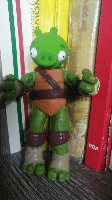
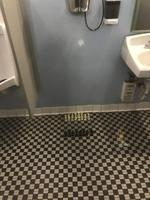
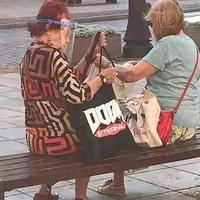
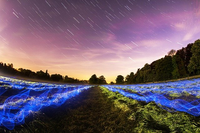
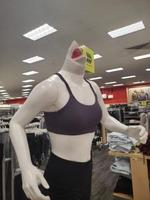
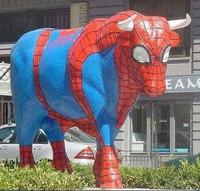
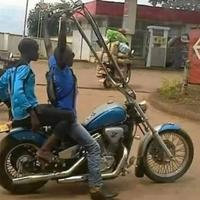
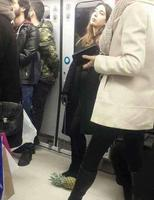
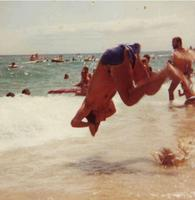
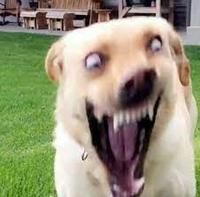
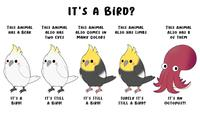
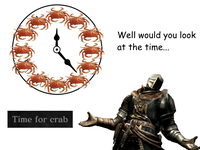
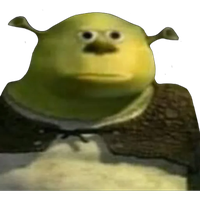
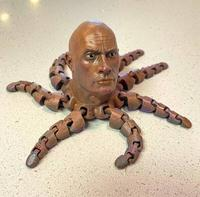
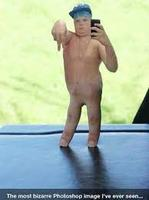

In [22]:
import pandas as pd
import glob
from PIL import Image
import os
from IPython.display import HTML
from io import BytesIO
import base64

def thumbnail(path):
    pic = Image.open(path)
    pic.thumbnail((200, 200), Image.LANCZOS)
    return pic

def image_formatter(pic):
    return f'<img src="data:image/{pic.format};base64,{image_base64(pic)}">'

def image_base64(pic):
    if isinstance(pic, str):
        pic = thumbnail(pic)
    with BytesIO() as buffer:
        pic.save(buffer, pic.format)
        return base64.b64encode(buffer.getvalue()).decode()

def display_table_with_images(table):
    return HTML(table.to_html(formatters={'image': image_formatter}, escape=False))

def load_images_to_table(dirname):
    data = []
    files = glob.glob(dirname + '/*')
    for filename in files:
        try:
            pic = Image.open(filename)
            pic.verify()
        except:
            continue
        
        thumbnail = get_thumbnail(filename)
        row = {
            'name': os.path.basename(pic.filename),
            'color model': pic.mode,   # я намагався картинку зі cmyk кольорами додати, але тоді її просто ноутбук не бачить і не відображає, тому лише rgb і rgba, все одно декілька варіантів
            'format': pic.format,
            'channels': len(pic.getbands()),
            'size': round(os.path.getsize(filename) / 1000 / 1000, 2),
            'width': pic.width,
            'height': pic.height,
            'full path': os.path.abspath(filename),
            'image': thumbnail
        }
        data.append(row)
    
    table = pd.DataFrame(data)
    return table

image_directory = 'pyi/my_folder'
image_table = load_images_to_table(image_directory)
display_table_with_images(image_table)


Створити функцію, що в якості аргумента приймає:
- шлях до папки;
- назва вихідного зображення;
- кількість зображень в рядку;
- кількість зображень в стовпчику
і повертає зображення постера.
Вважаємо, що постер є прямокутним і число картинок в постері a  b, де а –
число стовпчиків, а b – число рядків.
Зауваження:
1) Створити функцію, що перетворює картинку на квадрат з максимально
можливим розміром сторони (наприклад, якщо картинка розміром 800x533,
то вихідний розмір повинен бути 533x533). Обрізаємо картинку з двох країв,
тобто розмір розраховуємо від центру.
2) Всі картинки, з яких створено постер, повинні бути однакового розміру,
Тобто після обрізки необхідно змінити розмір, наприклад, на 500x500.
3) Картинки для додавання в постер обирати випадковим чином. Картинки
можуть повторюватись.
4) На картинку «накласти фільтр» червоного, зеленого, синього, жовтого,
пурпурного або голубого кольорів, що також обираються випадковим чином
та можуть повторюватись.
5) Надати 3-4 варіанти постерів, що збережено у файлах на диску.
6) Використовувати зображення, що знаходяться в папці, що сформована в
завданні 1
7) Для обробки зображень використовувати бібліотеки Pillow та/або OpenCV.

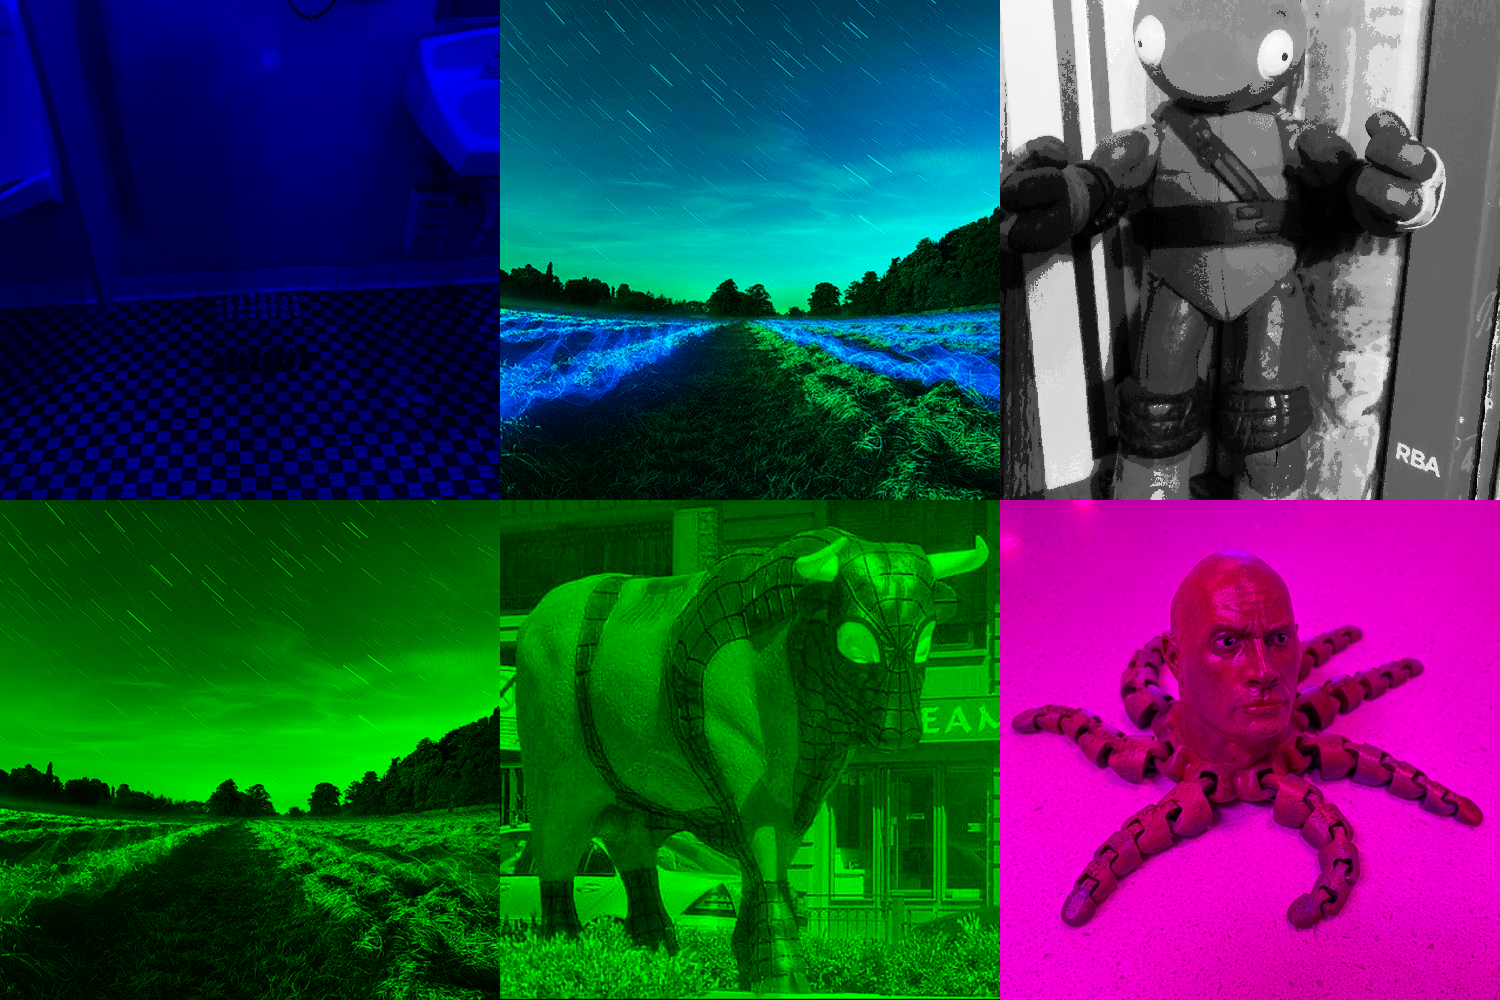

In [73]:
import os
import random
from PIL import Image
import numpy as np
import glob

def get_random_choice(lst):
    return random.choice(lst)

def crop_to_square(im):
    width, height = im.size
    size = min(width, height)
    left = (width - size) // 2
    top = (height - size) // 2
    right = (width + size) // 2
    bottom = (height + size) // 2
    return im.crop((left, top, right, bottom))

def apply_random_color_effect(im):
    filters = ['Red', 'Green', 'Blue', 'Cyan', 'Yellow', 'Magenta']
    color_effect = get_random_choice(filters)
    img_array = np.array(im)
    
    if len(img_array.shape) == 3:
        if color_effect == 'Red':
            img_array[:,:,1:3] = 0
        elif color_effect == 'Green':
            img_array[:,:,[0,2]] = 0
        elif color_effect == 'Blue':
            img_array[:,:,0:2] = 0
        elif color_effect == 'Cyan':
            img_array[:,:,0] = 0
        elif color_effect == 'Yellow':
            img_array[:,:,2] = 0  
        elif color_effect == 'Magenta':
            img_array[:,:,1] = 0 
    
    return Image.fromarray(img_array)

def generate_poster(input_directory, output_file, columns, rows):
    base_filename, file_extension = os.path.splitext(output_file)
    counter = 1
    new_file_path = output_file

    while os.path.exists(new_file_path):
        new_file_path = f"{base_filename}_{counter}{file_extension}"
        counter += 1
    
    files = glob.glob(os.path.join(input_directory, '*'))
    if not files:
        raise FileNotFoundError("No files found in the specified directory.")
    if columns <= 0 or rows <= 0:
        raise ValueError("Columns and rows must be greater than 0.")
    
    images = []
    for filename in files:
        try:
            image = Image.open(filename)
            image.verify()
            images.append(Image.open(filename))
        except:
            continue
    
    squared_images = []
    for im in images:
        squared_images.append(crop_to_square(im).resize((500, 500)))
    
    new_image = Image.new('RGB', (500 * columns, 500 * rows))
    for col in range(columns):
        for r in range(rows):
            img = get_random_choice(squared_images)
            new_image.paste(apply_random_color_effect(img), (col * 500, r * 500))

    os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
    
    new_image.save(new_file_path)
    return new_image

image_directory = 'pyi/my_folder'
output_poster_file = 'pyi/posters/poster.png'
columns_count = 3
rows_count = 2

generate_poster(image_directory, output_poster_file, columns_count, rows_count)


<td><img src="pyi/posters/poster_1.png"></td>

<td><img src="pyi/posters/poster_2.png"></td>

<td><img src="pyi/posters/poster_3.png"></td>